## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

W1130 21:50:30.400144  8648 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1130 21:50:30.412113  8648 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1130 21:50:30.415104  8648 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""

model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W1130 21:50:33.206115  8648 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1130 21:50:33.211072  8648 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W1130 21:50:50.736141  8648 deprecation.py:323] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1130 21:50:50.778052  8648 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 68us/step - loss: 1.9574 - acc: 0.2885 - val_loss: 1.7627 - val_acc: 0.3717
Epoch 2/100
50000/50000 [==============================] - 2s 41us/step - loss: 1.7146 - acc: 0.3868 - val_loss: 1.6841 - val_acc: 0.4016
Epoch 3/100
50000/50000 [==============================] - 2s 41us/step - loss: 1.6221 - acc: 0.4200 - val_loss: 1.6729 - val_acc: 0.4044
Epoch 4/100
50000/50000 [==============================] - 2s 41us/step - loss: 1.5663 - acc: 0.4424 - val_loss: 1.5594 - val_acc: 0.4430
Epoch 5/100
50000/50000 [==============================] - 2s 41us/step - loss: 1.5156 - acc: 0.4603 - val_loss: 1.4952 - val_acc: 0.4684
Epoch 6/100
50000/50000 [==============================] - 2s 41us/step - loss: 1.4736 - acc: 0.4741 - val_loss: 1.4834 - val_acc: 0.4713
Epoch 7/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.4504 - acc: 0.4837 - val_loss: 1.4634 - 

50000/50000 [==============================] - 2s 41us/step - loss: 0.5810 - acc: 0.7934 - val_loss: 1.9426 - val_acc: 0.5064
Epoch 60/100
50000/50000 [==============================] - 2s 41us/step - loss: 0.5652 - acc: 0.7991 - val_loss: 1.9915 - val_acc: 0.5022
Epoch 61/100
50000/50000 [==============================] - 2s 40us/step - loss: 0.5464 - acc: 0.8041 - val_loss: 2.0045 - val_acc: 0.5029
Epoch 62/100
50000/50000 [==============================] - 2s 41us/step - loss: 0.5400 - acc: 0.8067 - val_loss: 2.0162 - val_acc: 0.5058
Epoch 63/100
50000/50000 [==============================] - 2s 41us/step - loss: 0.5297 - acc: 0.8073 - val_loss: 2.0548 - val_acc: 0.5087
Epoch 64/100
50000/50000 [==============================] - 2s 40us/step - loss: 0.5247 - acc: 0.8127 - val_loss: 2.0740 - val_acc: 0.5087
Epoch 65/100
50000/50000 [==============================] - 2s 41us/step - loss: 0.5249 - acc: 0.8120 - val_loss: 2.0864 - val_acc: 0.5024
Epoch 66/100
50000/50000 [==============

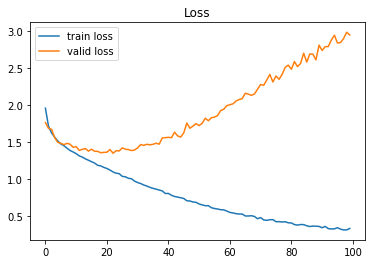

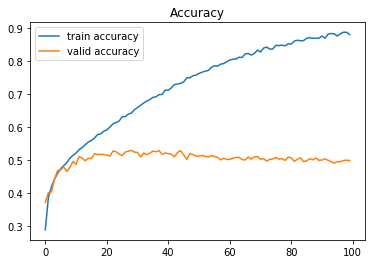

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()